<a href="https://colab.research.google.com/github/Praneeth2002/Electric_Vehicles_Segmentation/blob/main/EV_Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
import io
uploaded = files.upload()
car_info1 = pd.read_csv('car_info4.csv',sep=' ',engine='python')
car_info1.head()

Saving car_info4.csv to car_info4 (2).csv


Car   MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  Chevrolet  18.0        8.0         307.0       130.0  3504.0          12.0   
1      Buick  15.0        8.0         350.0       165.0  3693.0          11.5   
2   Plymouth  18.0        8.0         318.0       150.0  3436.0          11.0   
3        AMC  16.0        8.0         304.0       150.0  3433.0          12.0   
4       Ford  17.0        8.0         302.0       140.0  3449.0          10.5   

  Model Origin  
0    70     US  
1    70     US  
2    70     US  
3    70     US  
4    70     US

In [3]:
car_info1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car           406 non-null    object 
 1   MPG           406 non-null    float64
 2   Cylinders     406 non-null    float64
 3   Displacement  406 non-null    float64
 4   Horsepower    406 non-null    float64
 5   Weight        406 non-null    float64
 6   Acceleration  406 non-null    float64
 7   Model         406 non-null    object 
 8   Origin        405 non-null    object 
dtypes: float64(6), object(3)
memory usage: 28.7+ KB


In [4]:
car_info1.drop('Model',axis=1,inplace=True)

In [5]:
car_info1.dropna(inplace=True)
car_info1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 0 to 405
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car           405 non-null    object 
 1   MPG           405 non-null    float64
 2   Cylinders     405 non-null    float64
 3   Displacement  405 non-null    float64
 4   Horsepower    405 non-null    float64
 5   Weight        405 non-null    float64
 6   Acceleration  405 non-null    float64
 7   Origin        405 non-null    object 
dtypes: float64(6), object(2)
memory usage: 28.5+ KB


In [6]:
car_info1.describe()

MPG   Cylinders  Displacement  Horsepower       Weight  \
count  405.000000  405.000000    405.000000  405.000000   405.000000   
mean    23.158272    5.469136    194.514815  103.439506  2978.491358   
std      8.254777    1.709658    104.916373   40.530082   847.847746   
min      0.000000    3.000000     68.000000    0.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2226.000000   
50%     22.400000    4.000000    151.000000   93.000000  2815.000000   
75%     29.000000    8.000000    302.000000  129.000000  3620.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       Acceleration  
count    405.000000  
mean      15.538272  
std        2.781719  
min        8.000000  
25%       13.700000  
50%       15.500000  
75%       17.200000  
max       24.800000

In [7]:
car_info1 = car_info1[car_info1.MPG>0]
car_info1 = car_info1[car_info1.Horsepower>0]
car_info1.describe()

MPG   Cylinders  Displacement  Horsepower       Weight  \
count  393.000000  393.000000    393.000000  393.000000   393.000000   
mean    23.437913    5.468193    194.225191  104.483461  2977.132316   
std      7.796661    1.705223    104.576031   38.443045   848.365742   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2226.000000   
50%     22.500000    4.000000    151.000000   94.000000  2800.000000   
75%     29.000000    8.000000    267.000000  125.000000  3613.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       Acceleration  
count    393.000000  
mean      15.540967  
std        2.755352  
min        8.000000  
25%       13.800000  
50%       15.500000  
75%       17.000000  
max       24.800000

In [8]:
car_info1.Car.value_counts()

Ford          48
Chevrolet     44
Plymouth      31
Dodge         28
AMC           27
Toyota        26
Datsun        23
Volkswagen    22
Buick         17
Pontiac       16
Honda         13
Mazda         12
Mercury       11
Oldsmobile    10
Fiat           8
Peugeot        8
Audi           7
Volvo          6
Chrysler       6
Saab           5
Subaru         4
Opel           4
Mercedes       3
Renault        3
Cadillac       2
BMW            2
Chevy          2
Chevrolete     1
Capri          1
Hi             1
Triumph        1
Nissan         1
Name: Car, dtype: int64

In [9]:
car_info1.Origin.value_counts()

US        245
Japan      79
Europe     69
Name: Origin, dtype: int64

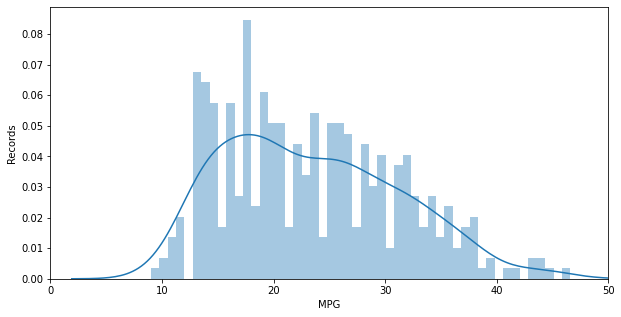

In [10]:
plt.figure(figsize=(10,5))
plt.xlim(0,50)
plt.xlabel('MPG')
plt.ylabel('Records')
sns.distplot(car_info1['MPG'],bins=50,kde=True)
plt.show()

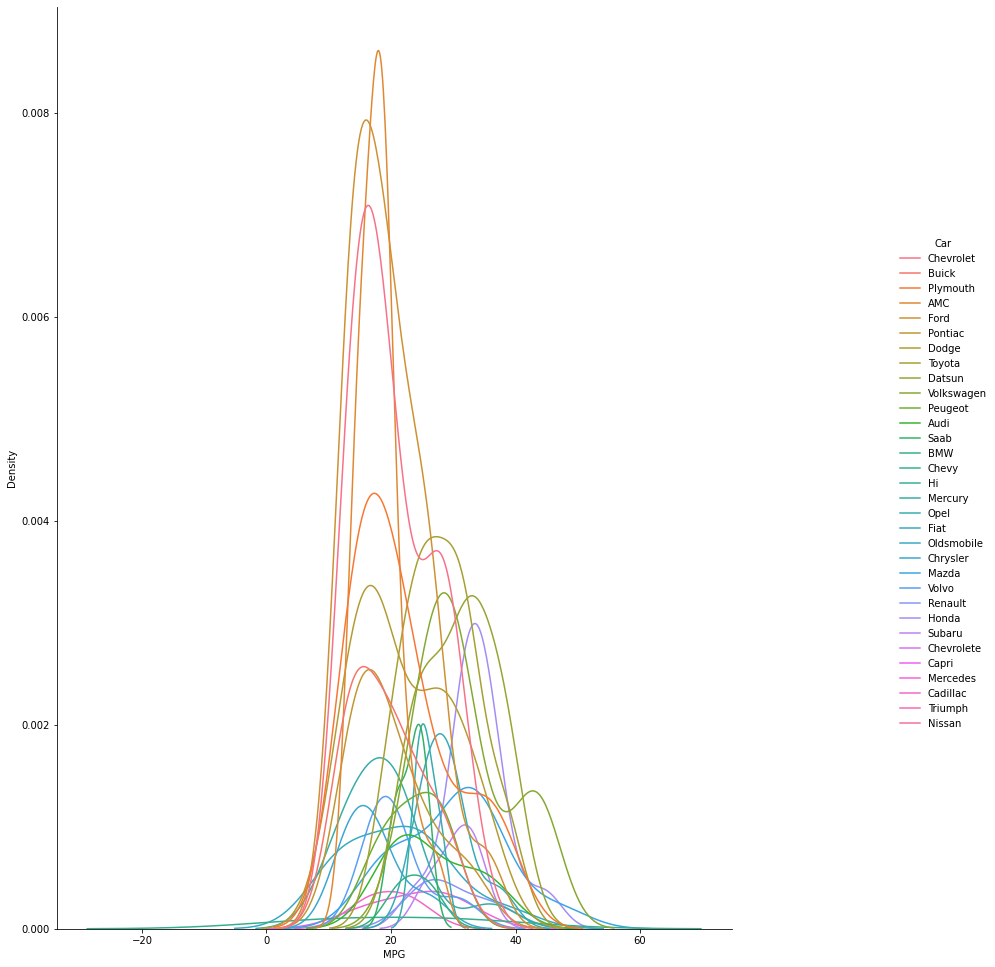

In [11]:
p = sns.displot(data=car_info1, x="MPG", hue="Car", kind="kde")
plt.gcf().set_size_inches(15,15)

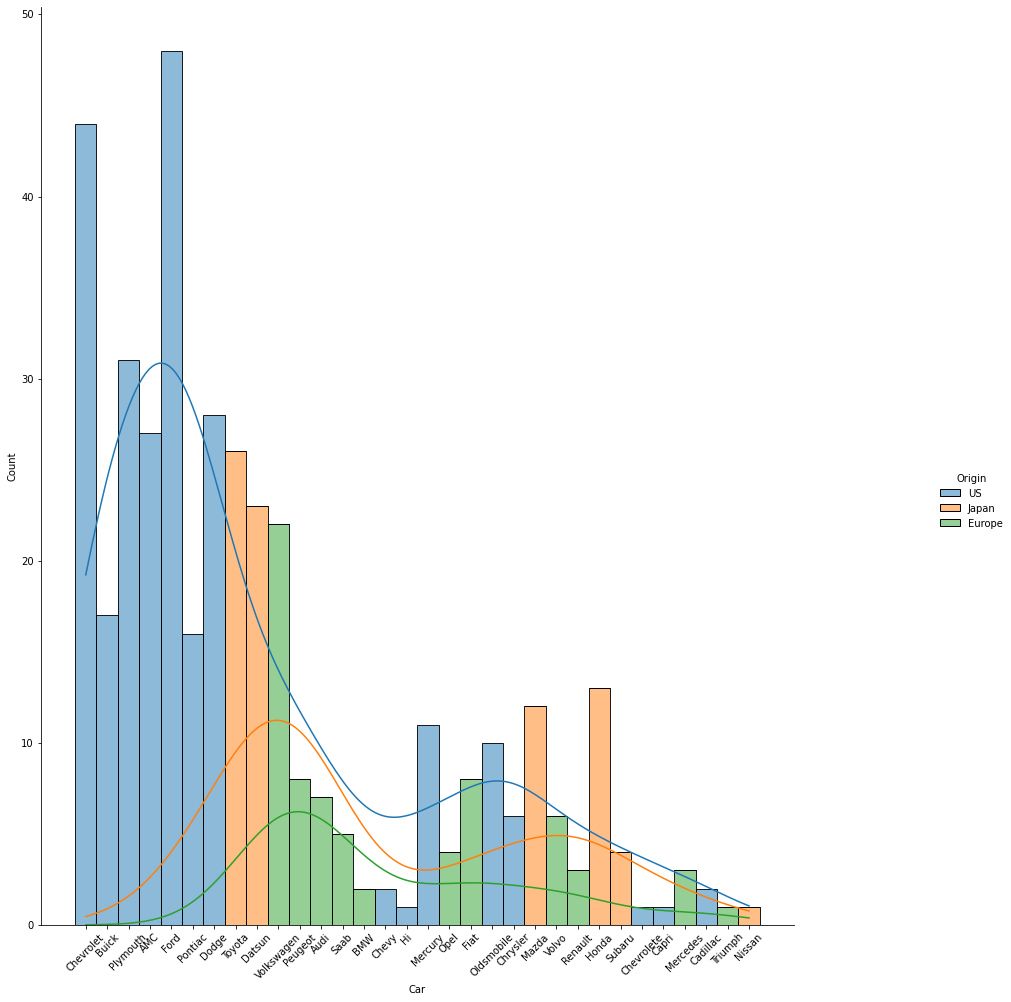

In [12]:
p = sns.displot(data=car_info1, x="Car", hue="Origin", multiple="stack",kde=True)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(15,15)

In [13]:
car_info1.Car.value_counts()[:5]

Ford         48
Chevrolet    44
Plymouth     31
Dodge        28
AMC          27
Name: Car, dtype: int64

In [14]:
uploaded = files.upload()
car_info2 = pd.read_csv('car_info3.csv')
car_info2.head()

Saving car_info3.csv to car_info3 (1).csv


Brand Name  Battery Capacity(kWh)  Acceleration(sec)  \
0  Audi RS e-tron GT                    93.4                3.3   
1     Audi e-tron GT                    93.4                4.1   
2        Audi e-tron                    95.0                5.7   
3       Tata Nexon EV                   30.2                9.9   
4       Tata Tigor EV                   26.0                5.7   

   TopSpeed(km/h)  Range(km)  Max Power(kW)  Max Torque(Nm) Transmission  \
0             250        480            500             830    Automatic   
1             245        500            523             630    Automatic   
2             200        484            300             664    Automatic   
3             180        312             96             245    Automatic   
4             120        306             55             170    Automatic   

   No. of Seats  Charging T(h) No. of Airbags Drive Type  Price(Lh)  
0             5              9            Yes        AWD        204  
1             5              9            Yes        AWD        179  
2             5              9            Yes        AWD        123  
3             5              9            Yes        FWD         17  
4             5              9            Yes        FWD         14

In [15]:
car_info2['Brand Name'] = car_info2['Brand Name'].str.split().str[0]
car_info2.head()

Brand Name  Battery Capacity(kWh)  Acceleration(sec)  TopSpeed(km/h)  \
0       Audi                   93.4                3.3             250   
1       Audi                   93.4                4.1             245   
2       Audi                   95.0                5.7             200   
3       Tata                   30.2                9.9             180   
4       Tata                   26.0                5.7             120   

   Range(km)  Max Power(kW)  Max Torque(Nm) Transmission  No. of Seats  \
0        480            500             830    Automatic             5   
1        500            523             630    Automatic             5   
2        484            300             664    Automatic             5   
3        312             96             245    Automatic             5   
4        306             55             170    Automatic             5   

   Charging T(h) No. of Airbags Drive Type  Price(Lh)  
0              9            Yes        AWD        204  
1              9            Yes        AWD        179  
2              9            Yes        AWD        123  
3              9            Yes        FWD         17  
4              9            Yes        FWD         14

In [16]:
car_info2.drop(['Transmission','No. of Airbags','No. of Seats'],axis=1,inplace=True)

In [17]:
car_info2.head()

Brand Name  Battery Capacity(kWh)  Acceleration(sec)  TopSpeed(km/h)  \
0       Audi                   93.4                3.3             250   
1       Audi                   93.4                4.1             245   
2       Audi                   95.0                5.7             200   
3       Tata                   30.2                9.9             180   
4       Tata                   26.0                5.7             120   

   Range(km)  Max Power(kW)  Max Torque(Nm)  Charging T(h) Drive Type  \
0        480            500             830              9        AWD   
1        500            523             630              9        AWD   
2        484            300             664              9        AWD   
3        312             96             245              9        FWD   
4        306             55             170              9        FWD   

   Price(Lh)  
0        204  
1        179  
2        123  
3         17  
4         14

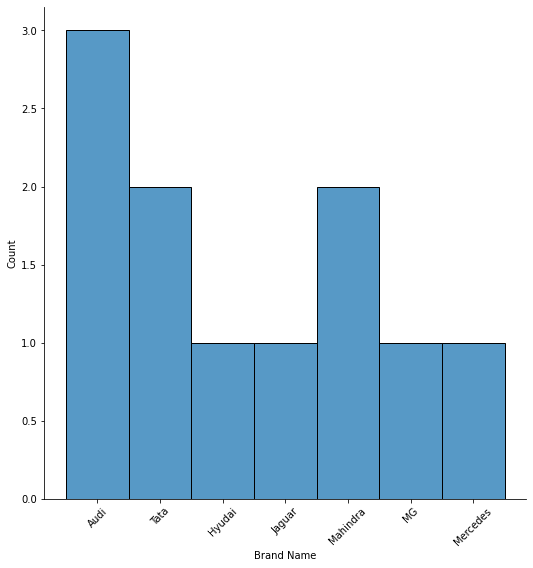

In [18]:
p = sns.displot(data=car_info2, x="Brand Name", multiple="stack")
plt.xticks(rotation=45)
plt.gcf().set_size_inches(8,8)

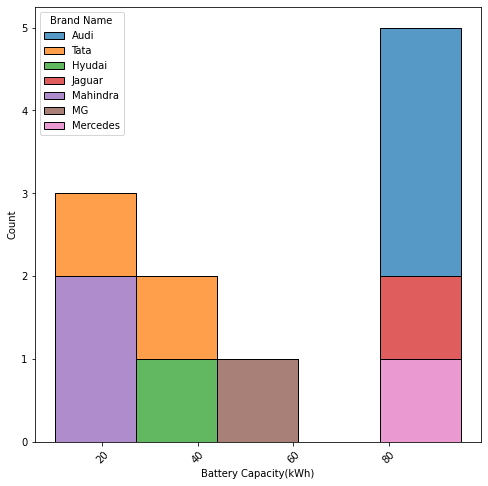

In [19]:
p = sns.histplot(data=car_info2, x="Battery Capacity(kWh)",hue='Brand Name', multiple="stack")
plt.xticks(rotation=45)
plt.gcf().set_size_inches(8,8)

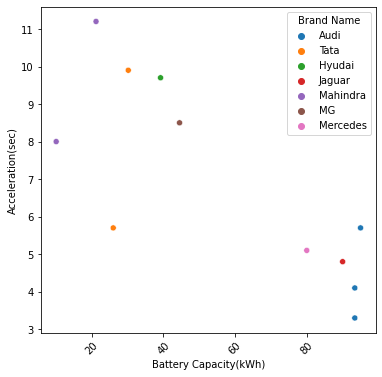

In [20]:
p = sns.scatterplot(data=car_info2,x='Battery Capacity(kWh)',y='Acceleration(sec)',hue='Brand Name')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(6,6)

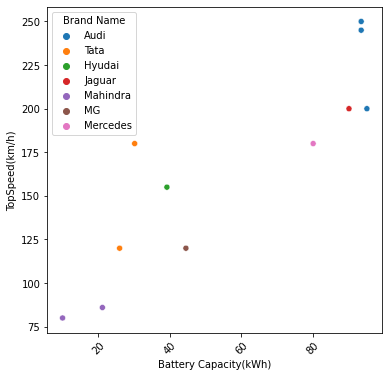

In [21]:
p = sns.scatterplot(data=car_info2,x='Battery Capacity(kWh)',y='TopSpeed(km/h)',hue='Brand Name')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(6,6)

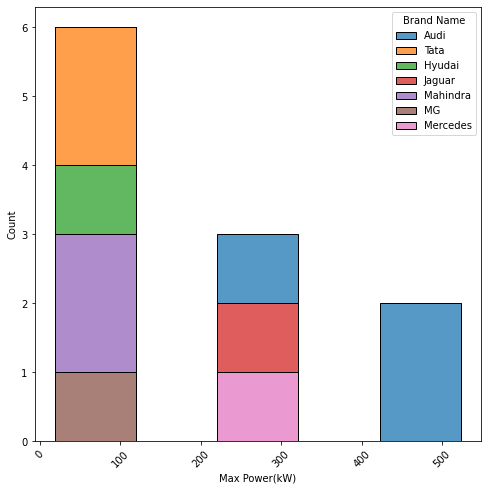

In [22]:
p = sns.histplot(data=car_info2, x="Max Power(kW)",hue='Brand Name', multiple="stack")
plt.xticks(rotation=45)
plt.gcf().set_size_inches(8,8)

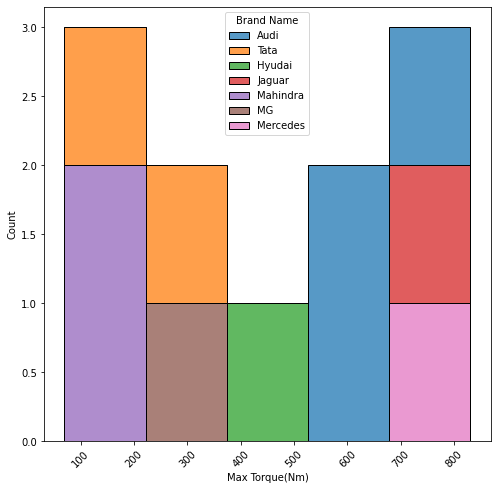

In [23]:
p = sns.histplot(data=car_info2, x="Max Torque(Nm)",hue='Brand Name', multiple="stack")
plt.xticks(rotation=45)
plt.gcf().set_size_inches(8,8)

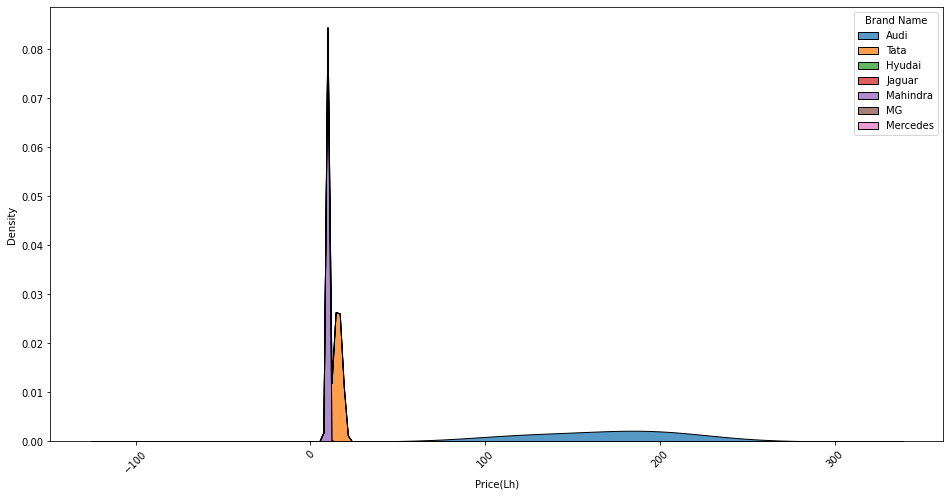

In [24]:
p = sns.kdeplot(data=car_info2, x="Price(Lh)",hue='Brand Name', multiple="stack")
plt.xticks(rotation=45)
plt.gcf().set_size_inches(16,8)

In [25]:
uploaded = files.upload()
car_info3 = pd.read_csv('ElectricCarData_Clean.csv')
car_info3.head()

Saving ElectricCarData_Clean.csv to ElectricCarData_Clean (1).csv


Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla   Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                       ID.3 Pure      10.0           160   
2    Polestar                               2       4.7           210   
3         BMW                            iX3        6.8           180   
4       Honda                              e        9.5           145   

   Range_Km  Efficiency_WhKm FastCharge_KmH RapidCharge PowerTrain  \
0       450              161            940         Yes        AWD   
1       270              167            250         Yes        RWD   
2       400              181            620         Yes        AWD   
3       360              206            560         Yes        RWD   
4       170              168            190         Yes        RWD   

     PlugType  BodyStyle Segment  Seats  PriceEuro  
0  Type 2 CCS      Sedan       D      5      55480  
1  Type 2 CCS  Hatchback       C      5      30000  
2  Type 2 CCS   Liftback       D      5      56440  
3  Type 2 CCS        SUV       D      5      68040  
4  Type 2 CCS  Hatchback       B      4      32997

In [26]:
car_info3.drop(['Model','Segment'],inplace=True,axis=1)

In [27]:
car_info3.head()

Brand  AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  \
0       Tesla        4.6           233       450              161   
1  Volkswagen       10.0           160       270              167   
2    Polestar        4.7           210       400              181   
3         BMW        6.8           180       360              206   
4       Honda        9.5           145       170              168   

  FastCharge_KmH RapidCharge PowerTrain    PlugType  BodyStyle  Seats  \
0            940         Yes        AWD  Type 2 CCS      Sedan      5   
1            250         Yes        RWD  Type 2 CCS  Hatchback      5   
2            620         Yes        AWD  Type 2 CCS   Liftback      5   
3            560         Yes        RWD  Type 2 CCS        SUV      5   
4            190         Yes        RWD  Type 2 CCS  Hatchback      4   

   PriceEuro  
0      55480  
1      30000  
2      56440  
3      68040  
4      32997

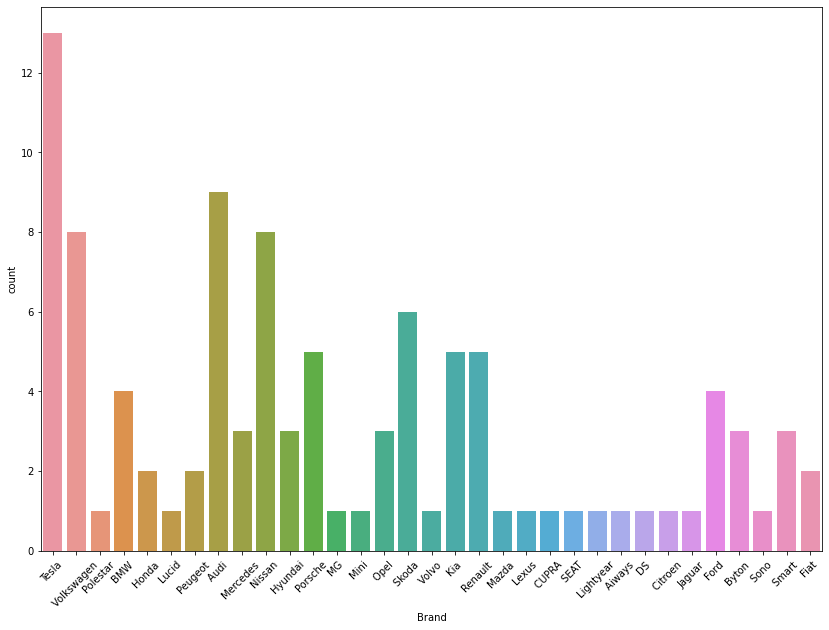

In [28]:
p = sns.countplot(data=car_info3,x='Brand')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(14,10)

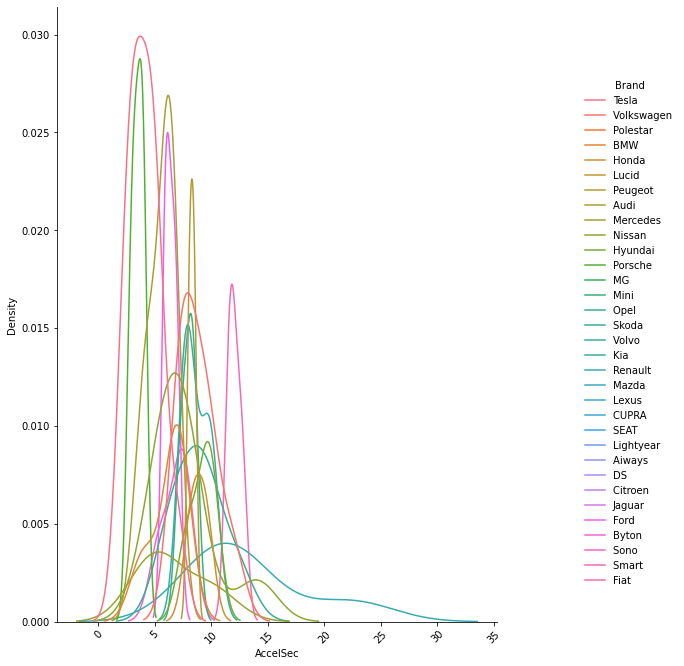

In [29]:
p = sns.displot(data=car_info3,x='AccelSec',hue='Brand',kind='kde')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(10,10)

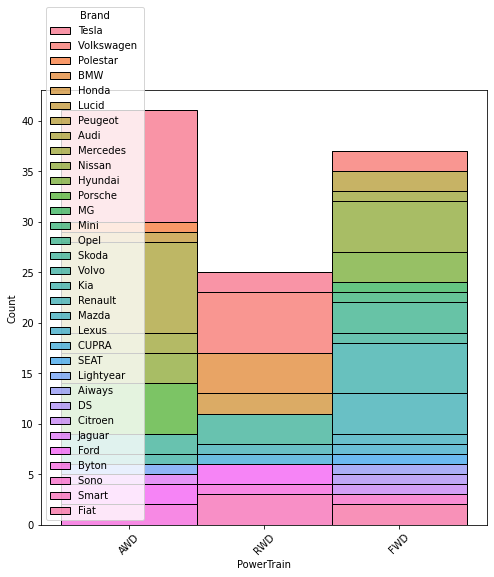

In [30]:
p = sns.histplot(data=car_info3, x="PowerTrain",hue='Brand', multiple="stack")
plt.xticks(rotation=45)
plt.gcf().set_size_inches(8,8)

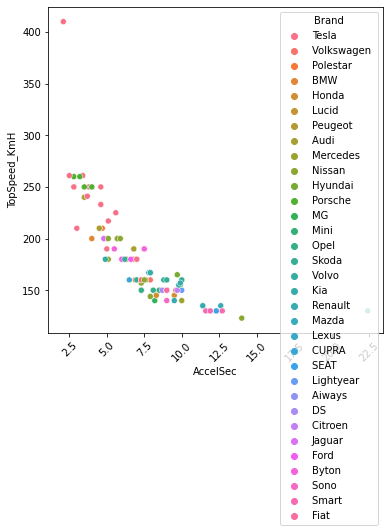

In [31]:
p = sns.scatterplot(data=car_info3,x='AccelSec',y='TopSpeed_KmH',hue='Brand')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(6,6)

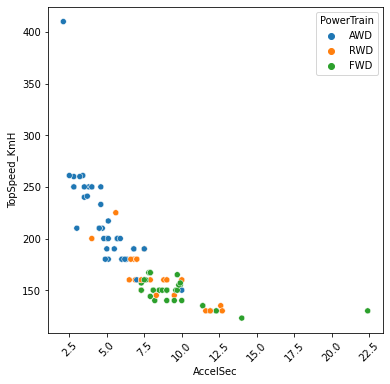

In [32]:
p = sns.scatterplot(data=car_info3,x='AccelSec',y='TopSpeed_KmH',hue='PowerTrain')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(6,6)

In [33]:
import plotly.express as px
fig = px.histogram(car_info3,x='PriceEuro',color='Brand')
fig.show()
# p = sns.histplot(data=car_info3,x='PriceEuro',hue='Brand',kde=True,element='step',fill=False)
# plt.xticks(rotation=45)
# plt.gcf().set_size_inches(10,10)

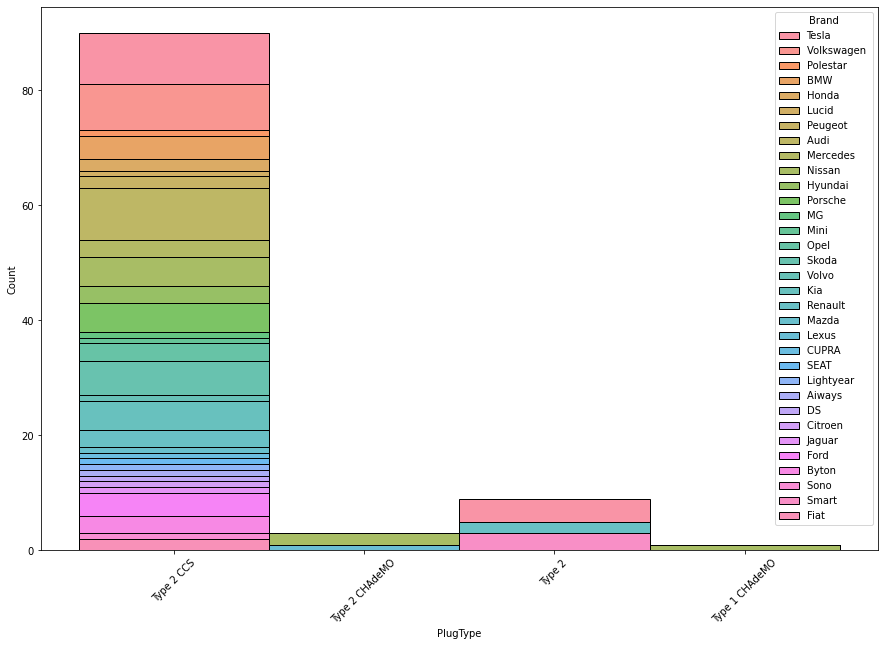

In [34]:
p = sns.histplot(data=car_info3, x="PlugType",hue='Brand', multiple="stack")
plt.xticks(rotation=45)
plt.gcf().set_size_inches(15,10)

In [35]:
uploaded = files.upload()
registration = pd.read_csv('registration.csv')
registration.head()

Saving registration.csv to registration (1).csv


Sl. No.             Category                      Vehicle Class  \
0        1  Transport Vehicles     Motor Cycle/Scooter-SideCar (T)   
1        2  Transport Vehicles   Motor Cycle/Scooter-Used For Hire   
2        3  Transport Vehicles                      E-Rickshaw (P)   
3        4  Transport Vehicles            E-Rickshaw with Cart (G)   
4        5  Transport Vehicles               Three Wheeler (Goods)   

  Vehicle SubClass  Total Registered on VAHAN 4.0  
0      Motor Cycle                              8  
1      Motor Cycle                           4468  
2         Rickshaw                         495781  
3         Rickshaw                          21871  
4    Three Wheeler                           2630

In [36]:
registration.drop('Sl. No.',axis=1,inplace=True)
registration.rename(columns={'Total Registered on VAHAN 4.0':'Total'},inplace=True)
registration.head()

Category                      Vehicle Class Vehicle SubClass  \
0  Transport Vehicles     Motor Cycle/Scooter-SideCar (T)      Motor Cycle   
1  Transport Vehicles   Motor Cycle/Scooter-Used For Hire      Motor Cycle   
2  Transport Vehicles                      E-Rickshaw (P)         Rickshaw   
3  Transport Vehicles            E-Rickshaw with Cart (G)         Rickshaw   
4  Transport Vehicles               Three Wheeler (Goods)    Three Wheeler   

    Total  
0       8  
1    4468  
2  495781  
3   21871  
4    2630

In [37]:
k = registration.groupby('Category')['Total'].sum()
tot_trans = k[1]
tot_non_trans = k[0]
print(k)
print(tot_trans,tot_non_trans)

Category
Non-Transport Vehicles    169969
Transport Vehicles        550491
Name: Total, dtype: int64
550491 169969


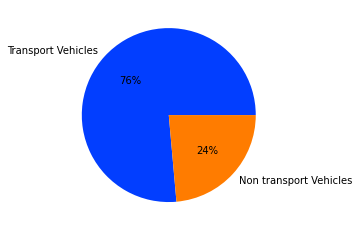

In [38]:
data = [550491,169969]
keys = ['Transport Vehicles','Non transport Vehicles']
palette_color = sns.color_palette('bright')
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()

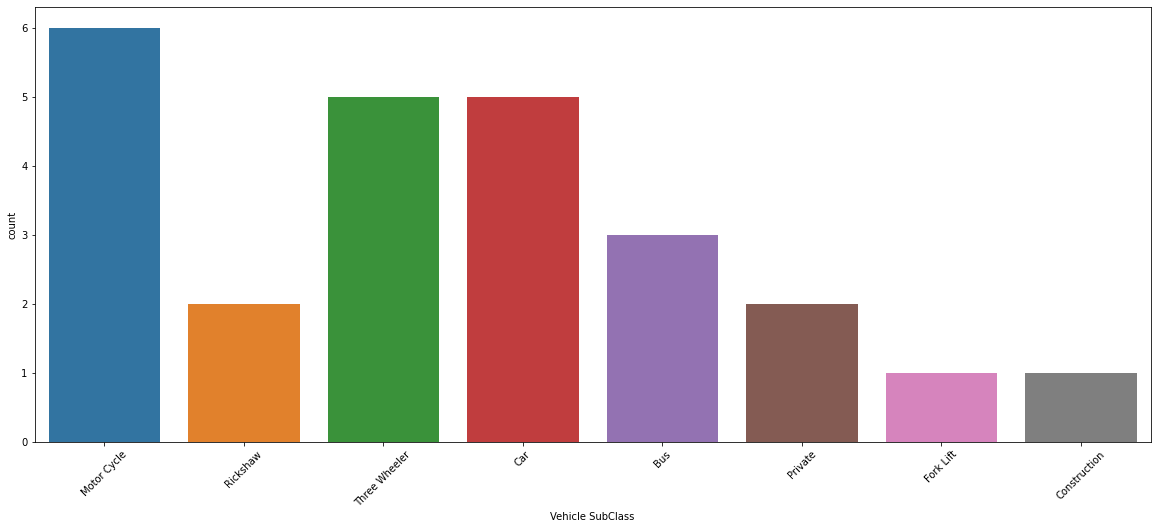

In [39]:
p = sns.countplot(data=registration,x='Vehicle SubClass')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(20,8)

In [40]:
uploaded = files.upload()
sales = pd.read_csv('total_sales.csv')
sales.head()

Saving total_sales.csv to total_sales (1).csv


hoi          State/UT  Total Number of Invoices/Sales
0   1     Jammu Kashmir                            1036
1   2  Himachal Pradesh                             446
2   3            Punjab                            2977
3   4        Chandigarh                             154
4   5       Uttarakhand                            2288

In [41]:
sales.drop('hoi',axis=1,inplace=True)
sales.rename(columns={'State/UT':'State','Total Number of Invoices/Sales':'Sales'},inplace=True)
sales = sales.iloc[:-1,:]

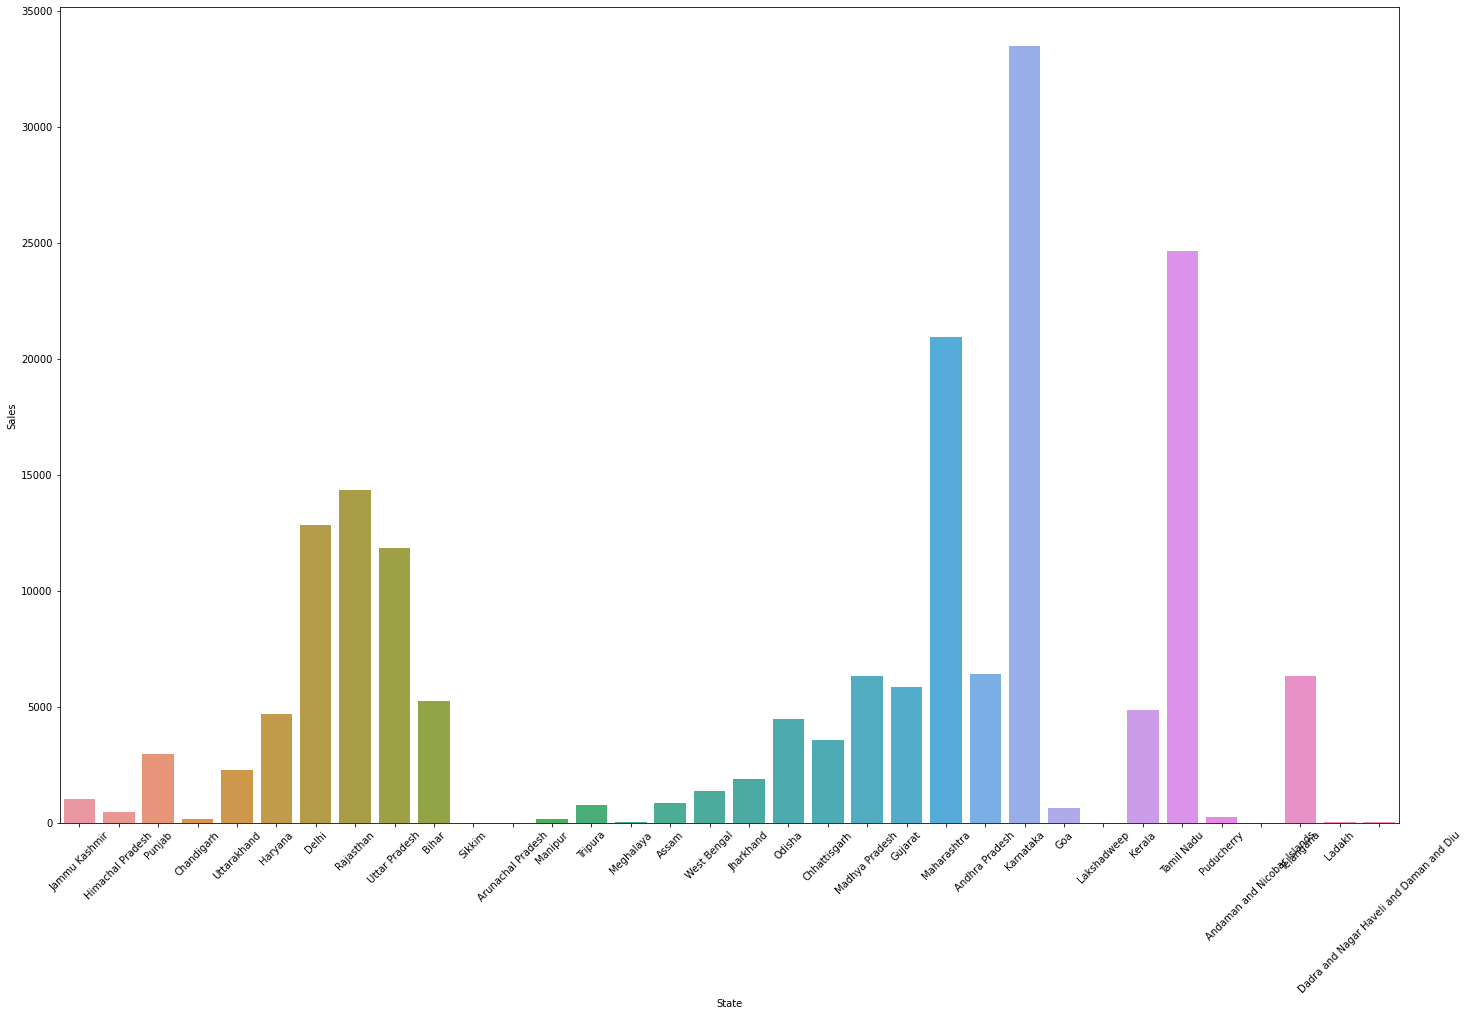

In [42]:
p = sns.barplot(data=sales, x="State", y="Sales")
plt.xticks(rotation=45)
plt.gcf().set_size_inches(24,15)

In [43]:
uploaded = files.upload()
charging_saction = pd.read_csv('charging_saction.csv')
charging_saction

Saving charging_saction.csv to charging_saction (1).csv


State/UT-wise  Number of Electric Vehicle Charging Sanctioned
0        Maharashtra                                             317
1     Andhra Pradesh                                             266
2         Tamil Nadu                                             256
3            Gujarat                                             228
4      Uttar Pradesh                                             207
5          Rajasthan                                             205
6          Karnataka                                             172
7     Madhya Pradesh                                             159
8        West Bengal                                             141
9          Telangana                                             138
10            Kerala                                             131
11             Delhi                                              72
12        Chandigarh                                              70
13           Haryana                                              50
14         Meghalaya                                              40
15             Bihar                                              37
16            Sikkim                                              29
17   Jammu & Kashmir                                              25
18      Chhattisgarh                                              25
19             Assam                                              20
20            Odisha                                              18
21       Uttarakhand                                              10
22        Puducherry                                              10
23  Himachal Pradesh                                              10

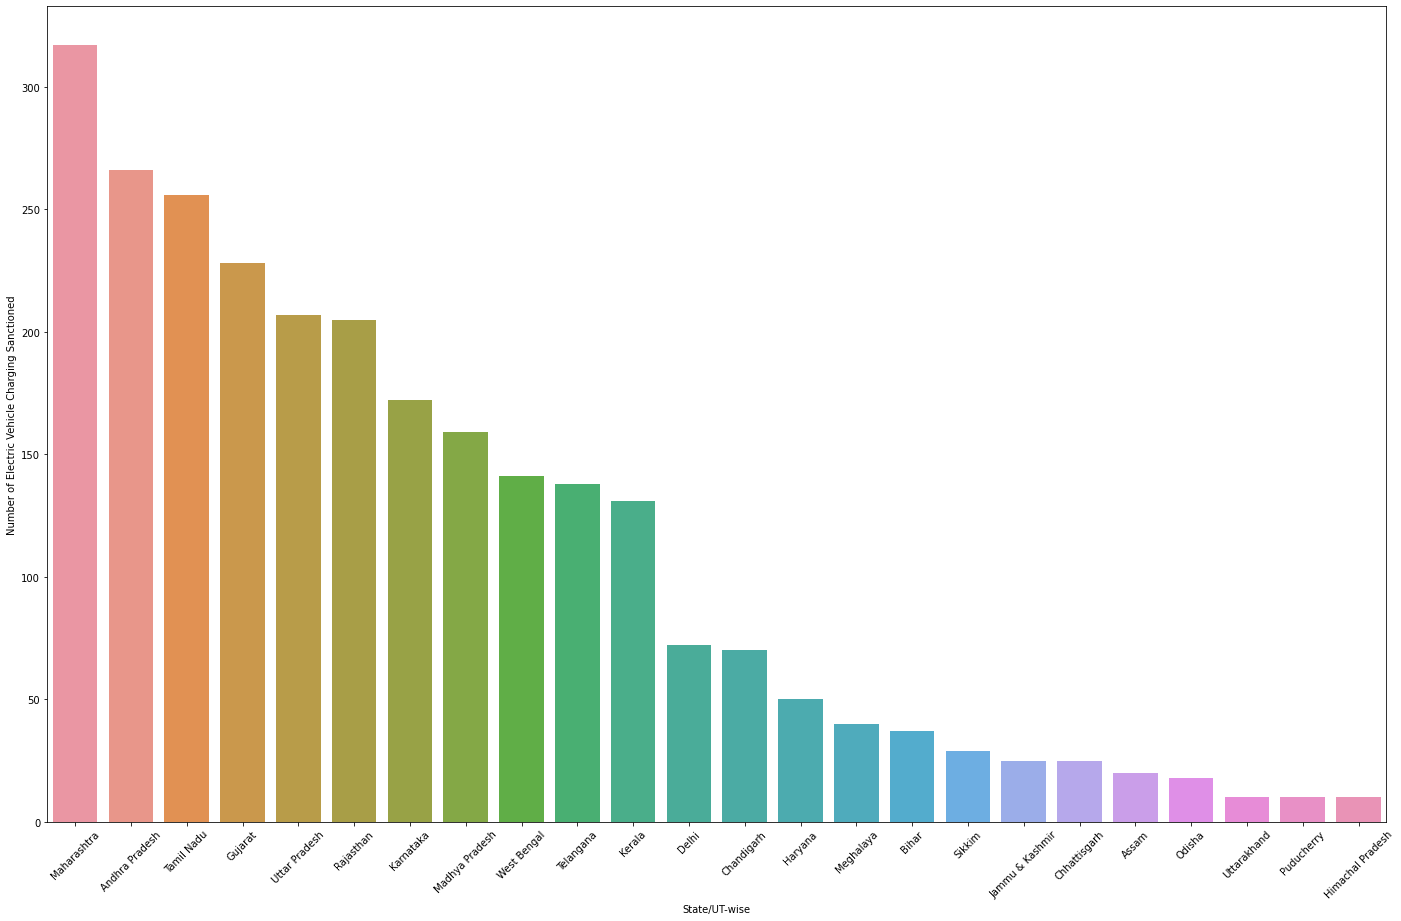

In [44]:
p = sns.barplot(data=charging_saction, x="State/UT-wise", y="Number of Electric Vehicle Charging Sanctioned")
plt.xticks(rotation=45)
plt.gcf().set_size_inches(24,15)

In [45]:
uploaded = files.upload()
total_ev = pd.read_csv('total_ev_to_non_ev.csv')
total_ev.head()

Saving total_ev_to_non_ev.csv to total_ev_to_non_ev (1).csv


StateName  TotalElectricVehicle  TotalNonElectricVehicle  \
0  Andaman&NicobarIsland                   162                   146945   
1       ArunachalPradesh                    20                   252965   
2                  Assam                 64766                  4677053   
3                  Bihar                 83335                 10407078   
4             Chandigarh                  2812                   746881   

      Total  
0    147107  
1    252985  
2   4741819  
3  10490413  
4    749693

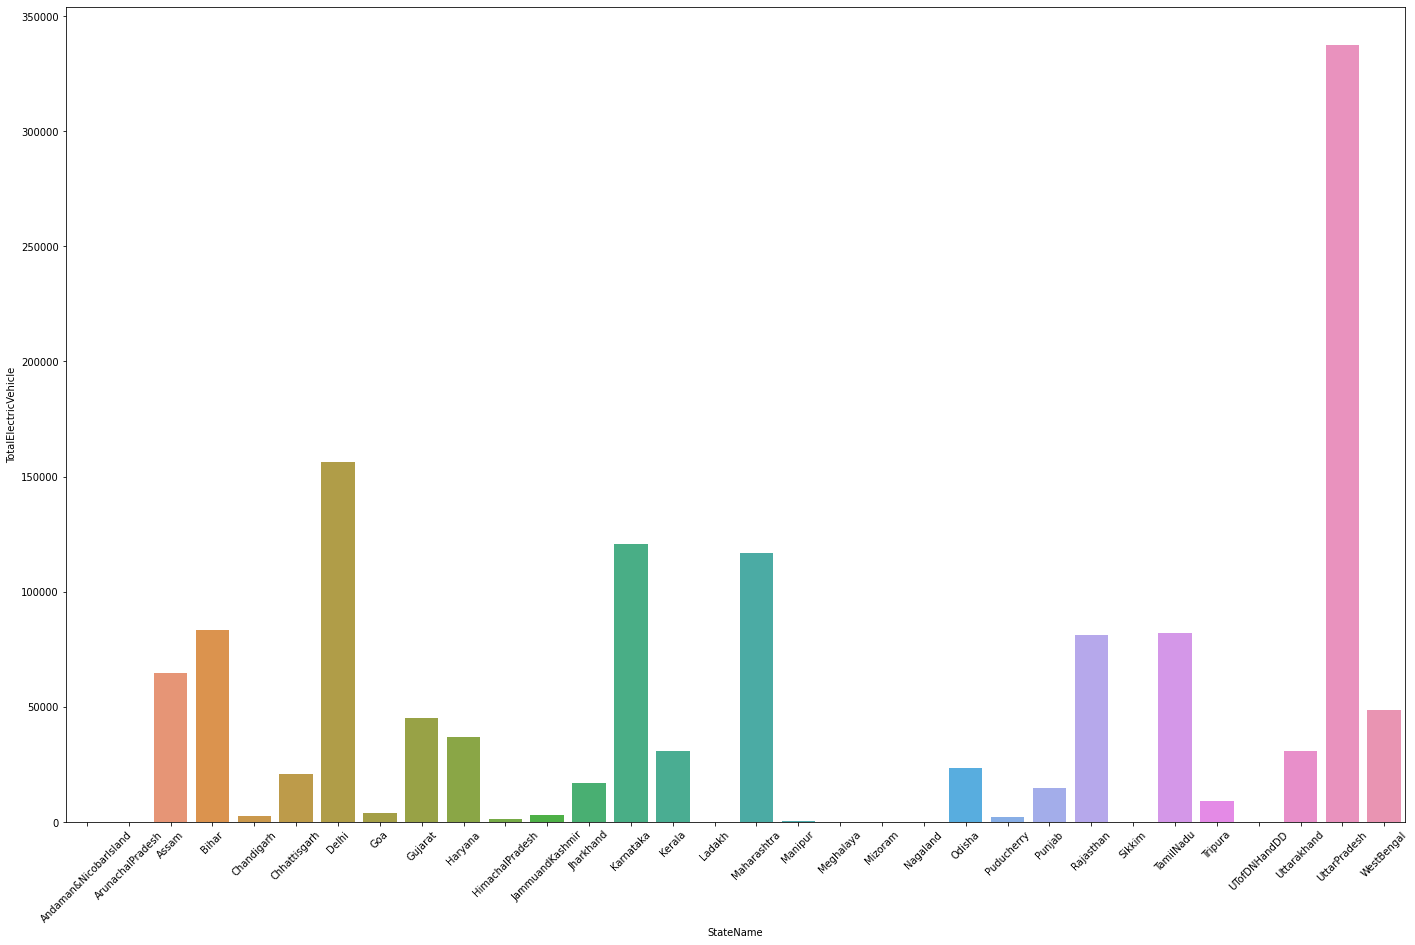

In [46]:
p = sns.barplot(data=total_ev, x="StateName", y="TotalElectricVehicle")
plt.xticks(rotation=45)
plt.gcf().set_size_inches(24,15)

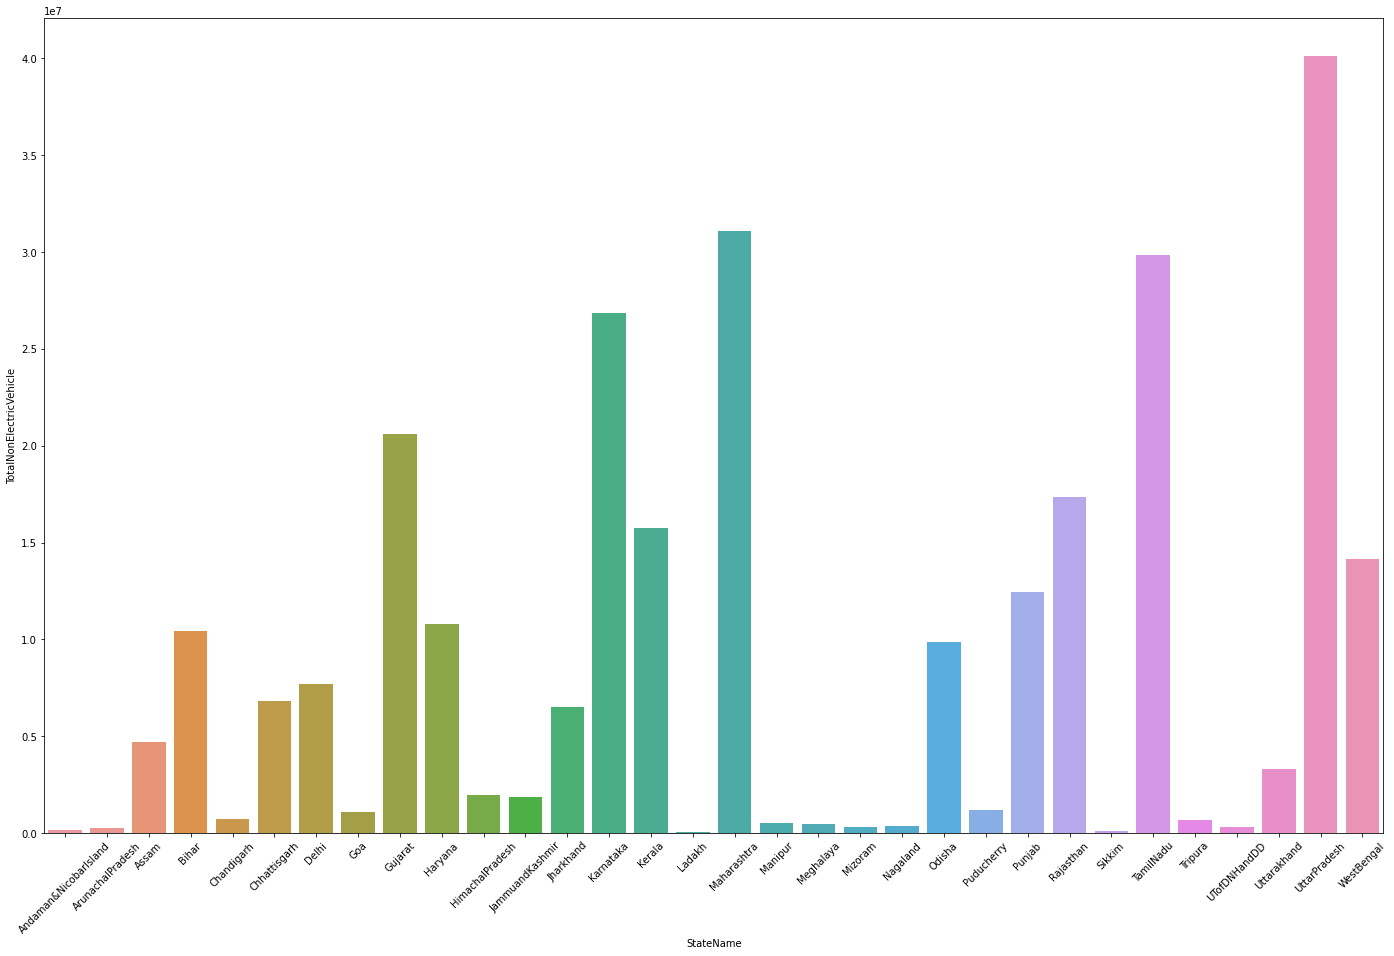

In [47]:
p = sns.barplot(data=total_ev, x="StateName", y="TotalNonElectricVehicle")
plt.xticks(rotation=45)
plt.gcf().set_size_inches(24,15)

In [48]:
total_ev['percentage_ev'] = (total_ev['TotalElectricVehicle']/total_ev['Total'])*100
total_ev.head()

StateName  TotalElectricVehicle  TotalNonElectricVehicle  \
0  Andaman&NicobarIsland                   162                   146945   
1       ArunachalPradesh                    20                   252965   
2                  Assam                 64766                  4677053   
3                  Bihar                 83335                 10407078   
4             Chandigarh                  2812                   746881   

      Total  percentage_ev  
0    147107       0.110124  
1    252985       0.007906  
2   4741819       1.365847  
3  10490413       0.794392  
4    749693       0.375087

In [49]:
fig = px.pie(total_ev,names='StateName',values='percentage_ev')
fig.show()

In [50]:
car_info3.head()

Brand  AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  \
0       Tesla        4.6           233       450              161   
1  Volkswagen       10.0           160       270              167   
2    Polestar        4.7           210       400              181   
3         BMW        6.8           180       360              206   
4       Honda        9.5           145       170              168   

  FastCharge_KmH RapidCharge PowerTrain    PlugType  BodyStyle  Seats  \
0            940         Yes        AWD  Type 2 CCS      Sedan      5   
1            250         Yes        RWD  Type 2 CCS  Hatchback      5   
2            620         Yes        AWD  Type 2 CCS   Liftback      5   
3            560         Yes        RWD  Type 2 CCS        SUV      5   
4            190         Yes        RWD  Type 2 CCS  Hatchback      4   

   PriceEuro  
0      55480  
1      30000  
2      56440  
3      68040  
4      32997

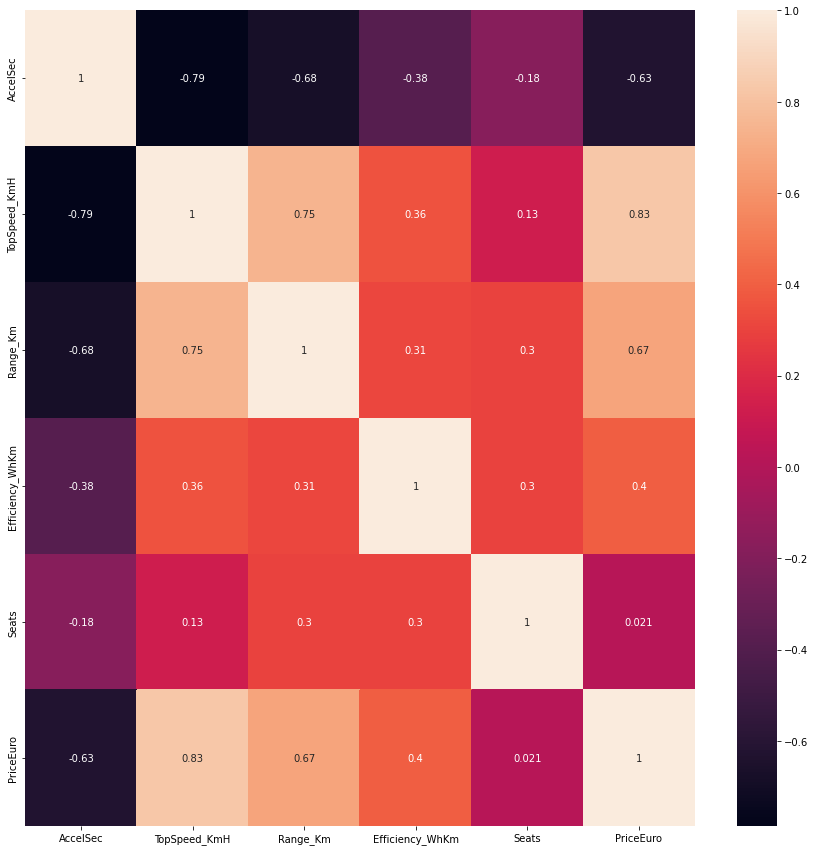

In [51]:
plt.figure(figsize=(15,15))
sns.heatmap(car_info3.corr(), annot=True)
plt.show()

In [52]:
#!pip install gower
import gower

distance_matrix = gower.gower_matrix(car_info3)

In [53]:
distance_matrix

array([[0.        , 0.40769464, 0.27212316, ..., 0.2954389 , 0.30785823,
        0.31990877],
       [0.40769464, 0.        , 0.40019923, ..., 0.30554965, 0.3387478 ,
        0.41338193],
       [0.27212316, 0.40019923, 0.        , ..., 0.27413678, 0.28573507,
        0.2977856 ],
       ...,
       [0.2954389 , 0.30554965, 0.27413678, ..., 0.        , 0.11653148,
        0.29344246],
       [0.30785823, 0.3387478 , 0.28573507, ..., 0.11653148, 0.        ,
        0.26937824],
       [0.31990877, 0.41338193, 0.2977856 , ..., 0.29344246, 0.26937824,
        0.        ]], dtype=float32)

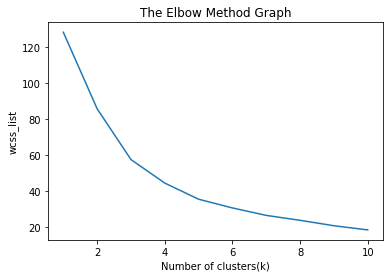

In [57]:
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(distance_matrix)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [55]:
from sklearn.cluster import DBSCAN

dbscan_cluster = DBSCAN(eps=0.3,min_samples=5,metric="precomputed")
dbscan_cluster.fit(distance_matrix)
labels = dbscan_cluster.labels_
car_info3["cluster"] = dbscan_cluster.labels_

In [56]:
print(car_info3['cluster'].value_counts())
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters :', n_clusters_)

 0    95
 1     5
-1     3
Name: cluster, dtype: int64
Estimated number of clusters : 2


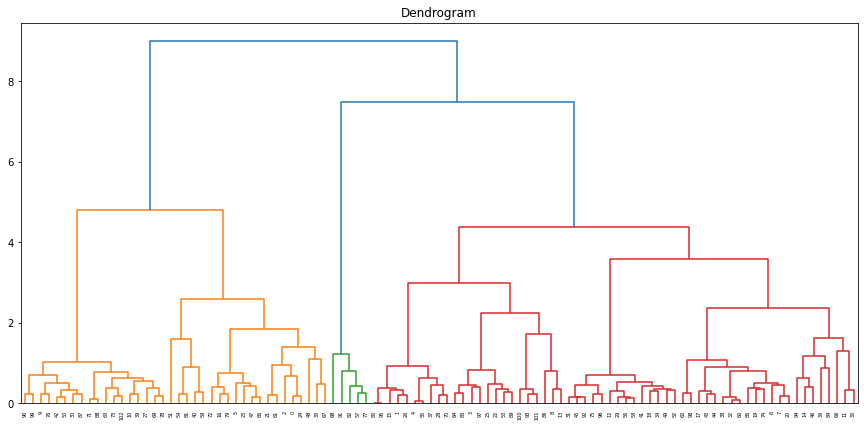

In [60]:
plt.figure(figsize=(15,7))
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(distance_matrix, method = 'ward'))
plt.title('Dendrogram')
plt.show()